# Analysis of doses

Basically checking when high doses outperform low doses.

A bit rougher than `103_dose_analysis`

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [2]:
import pandas as pd

from math import floor

from tqdm import tqdm

import copy

import seaborn as sns

import numpy as np
from scipy import signal

import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


from plots2.fns import (
    standard_layout,
    corner_annotations_colwise,
    corner_annotations_rowwise,
    get_text_annotation
)

from poly2.utils import beta_dist, gamma_dist
from poly2.config import Config, ConfigMixture
from poly2.simulator import (
    SimulatorOneTrait, SimulatorBothTraits,
    SimulatorMixture, SimulatorSimple,
    SimulatorSimpleWithDD
)

In [3]:
Config()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
asymptote = None
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_k = 50
n_l = 50
n_years = 15
replace_cultivars = None
sprays = None



In [4]:
mu = 9.5
b = 0.85
a = mu*b
gamma_var = a/b**2

In [5]:
gamma_var

11.176470588235293

In [3]:
COLZ = sns.color_palette('muted').as_hex()

In [4]:
# doses = np.linspace(0,1,11)
doses = np.linspace(0,1,6)

In [389]:
def yield_plot(yield_list, title=None):
    f, ax = plt.subplots()

    sns.set_palette("rocket", n_colors=len(yield_list))

    for ind, dt in enumerate(yield_list):
        ax.plot(dt, label=f'Dose = {doses[ind]:.2f}')

    ax.set_title(title)

    ax.set_xlabel('Year')
    ax.set_ylabel('Yield')

    ax.legend()
    
    return f

In [388]:
def sev_plot(yield_list, title=None):
    f, ax = plt.subplots()

    sns.set_palette("rocket", n_colors=len(yield_list))

    for ind, dt in enumerate(yield_list):
        ax.plot(100*dt, label=f'Dose = {doses[ind]:.2f}')

    ax.set_title(title)

    ax.set_xlabel('Year')
    ax.set_ylabel('Severity (%)')

    ax.legend()
    
    return f

In [387]:
def av_yield_plot(yield_list, title=None):
    f, ax = plt.subplots()

    sns.set_palette("rocket", n_colors=len(yield_list))

    for ind, dt in enumerate(yield_list):
        av_yld = np.cumsum(dt) / np.arange(1, 1+len(dt))
        ax.plot(av_yld, label=f'Dose = {doses[ind]:.2f}')

    ax.set_title(title)

    ax.set_xlabel('Year')
    ax.set_ylabel('Average yield from start')

    ax.legend()
    
    return f

# Single

In [10]:
cf = Config()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_k = 50
n_l = 50
n_years = 15
replace_cultivars = None
sprays = None
type = single



In [62]:
conf_plot = copy.deepcopy(cf)

data_list = []

for dd in doses:
    conf_plot.doses = dd*np.ones(conf_plot.n_years)
    
    data = SimulatorOneTrait(conf_plot).run_model()
    
    data_list.append(data['yield_vec'])

In [63]:
data_list

[array([8.81039122, 8.81039122, 8.81039122, 8.81039122, 8.81039122,
        8.81039122, 8.81039122, 8.81039122, 8.81039122, 8.81039122,
        8.81039122, 8.81039122, 8.81039122, 8.81039122, 8.81039122]),
 array([9.54171516, 9.54086271, 9.53973743, 9.53829919, 9.53647505,
        9.53408764, 9.53098994, 9.52698479, 9.52172632, 9.51487244,
        9.5059701 , 9.49449183, 9.47987266, 9.46158917, 9.43928858]),
 array([9.93582923, 9.93386256, 9.93085433, 9.92616314, 9.91874049,
        9.90680322, 9.88765539, 9.85743477, 9.81187092, 9.74853683,
        9.6704122 , 9.58697019, 9.50961316, 9.44519104, 9.39442142]),
 array([10.1505951 , 10.14811917, 10.14372501, 10.13566669, 10.12046966,
        10.09158075, 10.03878418,  9.95249499,  9.83707409,  9.71718418,
         9.61706365,  9.542062  ,  9.48575853,  9.4410557 ,  9.40350641]),
 array([10.2745928 , 10.27201909, 10.26693543, 10.25627177, 10.23303565,
        10.18311545, 10.08793463,  9.94875212,  9.80580667,  9.69408278,
         9.6134

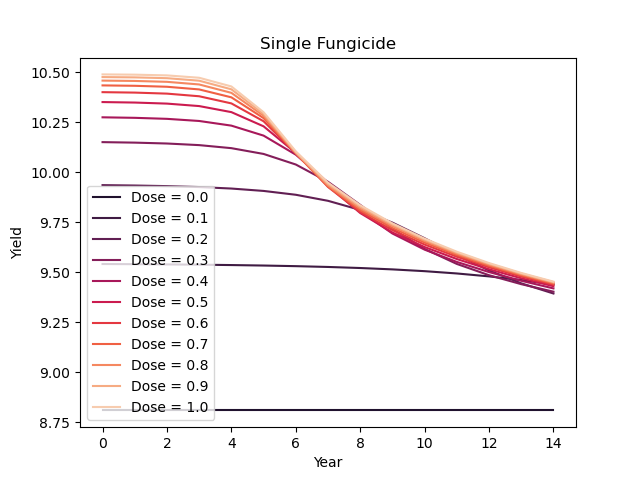

In [64]:
f = yield_plot(data_list, 'Single Fungicide')

In [65]:
f.savefig('../figures/rough/yld.jpg')

## Av yld

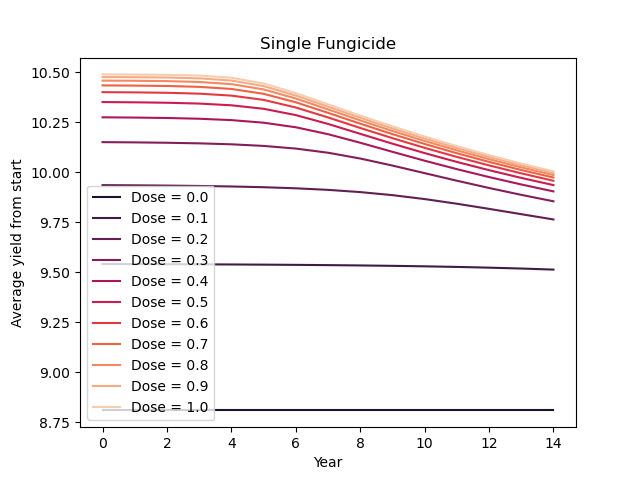

In [67]:
f = av_yield_plot(data_list, 'Single Fungicide')

In [20]:
f.savefig('../figures/rough/av_yld.jpg')

# Mixture

In [27]:
cfm = ConfigMixture()

CONFIG
------
A_b = 0.8431572316700577
A_mu = 9.44286788381916
B_b = 0.8431572316700577
B_mu = 9.44286788381916
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate_A = None
decay_rate_B = None
doses_A = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., ...
doses_B = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., ...
fungicide_mixture = True
host_on = [False]
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_k = 50
n_years = 15
sprays = None
type = single



In [29]:
cfm_plot = copy.deepcopy(cfm)

data_list_m = []

doses = np.linspace(0,1,11)

for dd in doses:
    cfm_plot.doses_A = dd*np.ones(cfm_plot.n_years)
    cfm_plot.doses_B = dd*np.ones(cfm_plot.n_years)
    
    data = SimulatorMixture(cfm_plot).run_model()
    
    data_list_m.append(data['yield_vec'])

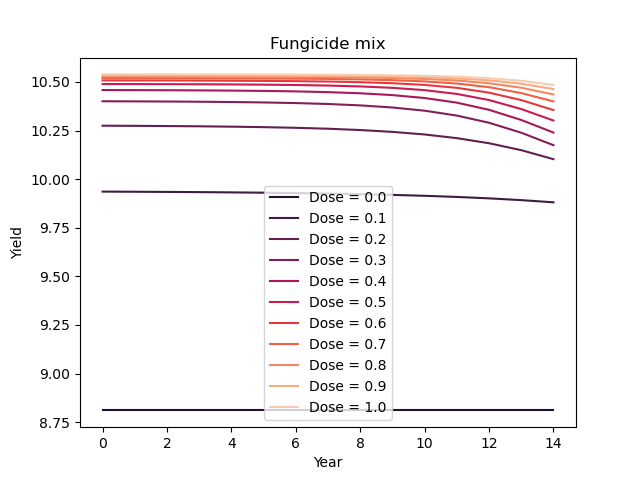

In [42]:
f = yield_plot(data_list_m, 'Fungicide Mix')

In [34]:
f.savefig('../figures/rough/yld_mix.jpg')

## Av yld

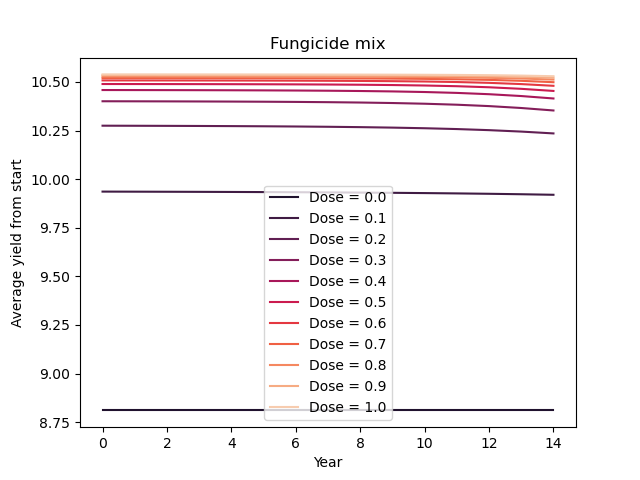

In [44]:
f = av_yield_plot(data_list_m, 'Fungicide Mix')

In [36]:
f.savefig('../figures/rough/av_yld_mix.jpg')

# Single, diff dist

In [174]:
cfd = Config()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_k = 50
n_l = 50
n_years = 15
replace_cultivars = None
sprays = None
type = single



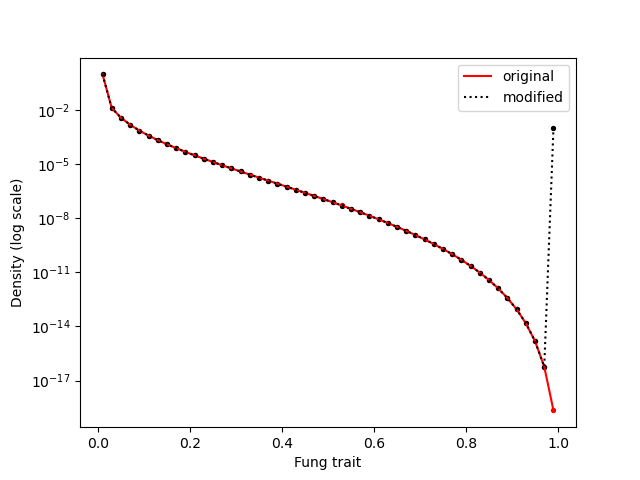

In [175]:
f, ax = plt.subplots()

b = cfd.k_b
a = cfd.k_b*cfd.k_mu

old_dist = gamma_dist(sim.n_k, a, b)

init_dist = (
    0.999* old_dist +
    0.001*signal.unit_impulse(sim.n_k, sim.n_k-1)
)

ax.plot(sim.k_vec, old_dist, label='original', c='r')
ax.scatter(sim.k_vec, old_dist, c='r', s=8)

ax.scatter(sim.k_vec, init_dist, c='k', s=8)
ax.plot(sim.k_vec, init_dist, label='modified', ls=':', c='k')

ax.set_xlabel('Fung trait')
ax.set_ylabel('Density (log scale)')

ax.legend()

ax.set_yscale('log')

In [173]:
f.savefig('../figures/rough/modified_dist.jpg')

In [146]:
doses = [0.5, 1]

In [176]:
conf_plot = copy.deepcopy(cfd)

data_list_d = []

for dd in doses:
    conf_plot.doses = dd*np.ones(conf_plot.n_years)
    
    sim = SimulatorOneTrait(conf_plot)

    sim.initial_k_dist = init_dist
    
    data = sim.run_model()
    
    data_list_d.append(data['yield_vec'])

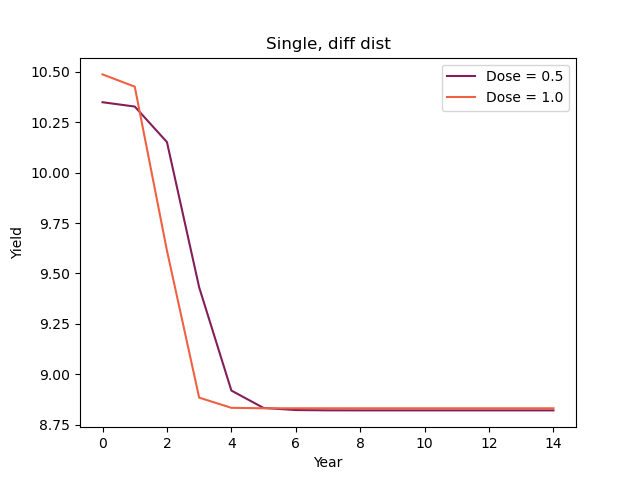

In [177]:
f = yield_plot(data_list_d, 'Single, diff dist')

In [178]:
f.savefig('../figures/rough/yld_diff_dist.jpg')

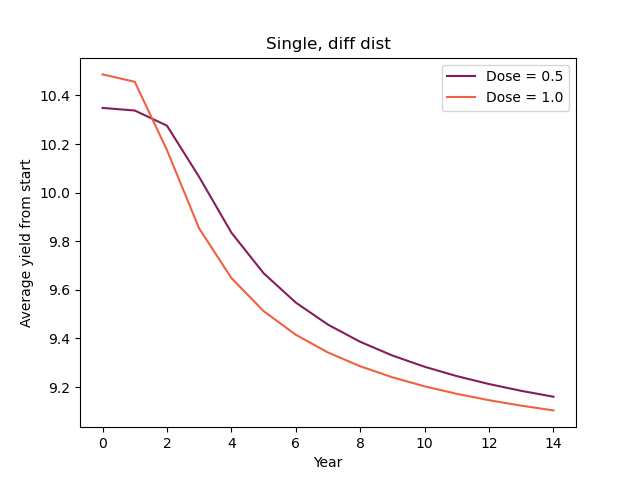

In [179]:
f = av_yield_plot(data_list_d, 'Single, diff dist')

In [153]:
f.savefig('../figures/rough/av_yld_diff_dist.jpg')

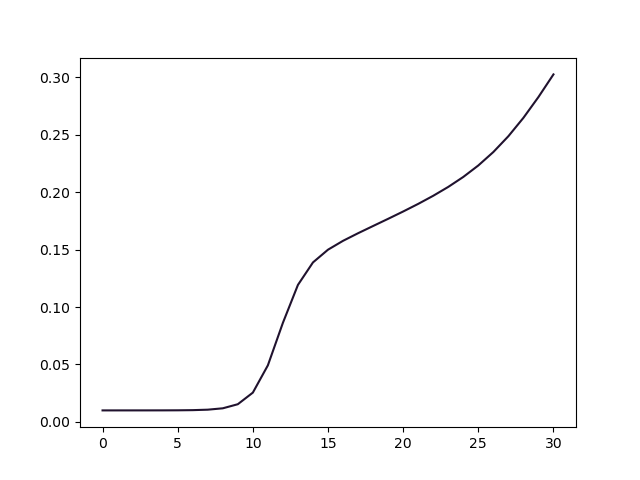

In [77]:
f, ax = plt.subplots()

ax.plot(data['fung_mean'])

# Mixtures

In [230]:
cfdm = ConfigMixture(decay_rate_A=6.91e-3, decay_rate_B=1.11e-1)
# cfdm = ConfigMixture()

CONFIG
------
A_b = 0.8431572316700577
A_mu = 9.44286788381916
B_b = 0.8431572316700577
B_mu = 9.44286788381916
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate_A = 0.00691
decay_rate_B = 0.111
doses_A = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., ...
doses_B = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., ...
fungicide_mixture = True
host_on = [False]
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_k = 50
n_years = 15
sprays = None
type = single



In [215]:
init_dist2 = (
    0.999* old_dist +
    0.001*signal.unit_impulse(sim.n_k, sim.n_k-1)
)

In [231]:
conf_plot = copy.deepcopy(cfdm)

data_list_dm = []

for dd in doses:
    conf_plot.doses_A = dd*np.ones(conf_plot.n_years)
    conf_plot.doses_B = dd*np.ones(conf_plot.n_years)
    
    sim = SimulatorMixture(conf_plot)

    sim.initial_fA_dist = init_dist2
    sim.initial_fB_dist = init_dist2
    
    data = sim.run_model()
    
    data_list_dm.append(data['yield_vec'])

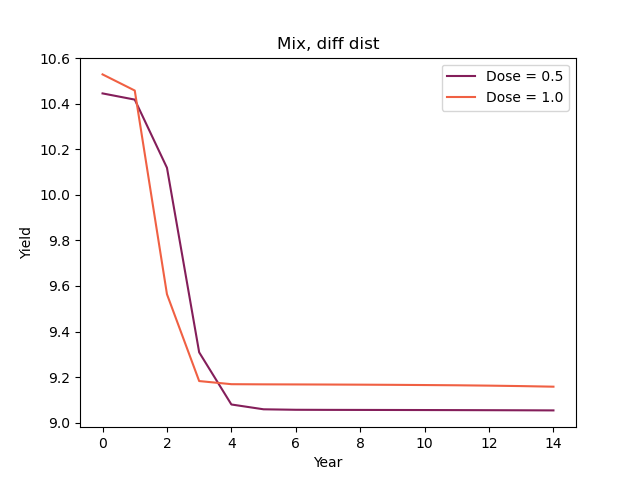

In [217]:
f = yield_plot(data_list_dm, 'Mix, diff dist')

In [232]:
f.savefig('../figures/rough/yld_mix_diff_dist.jpg')

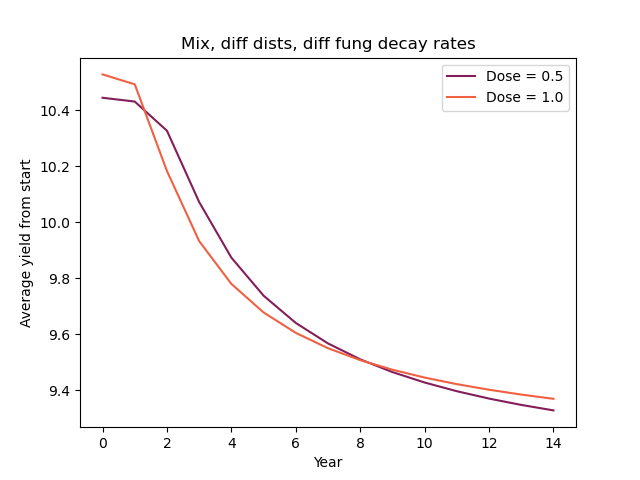

In [233]:
f = av_yield_plot(data_list_dm, 'Mix, diff dists, diff fung decay rates')

In [234]:
f.savefig('../figures/rough/av_yld_mix_diff_dist.jpg')

# Complete monogenic analogy

In [260]:
# cfdm = ConfigMixture(decay_rate_A=6.91e-3, decay_rate_B=1.11e-1)
cfdm = ConfigMixture(n_years=20)
cfdm.mutation_proportion = 1e-8
cfdm.mutation_scale_fung = 1e-8

CONFIG
------
A_b = 0.8431572316700577
A_mu = 9.44286788381916
B_b = 0.8431572316700577
B_mu = 9.44286788381916
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate_A = None
decay_rate_B = None
doses_A = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., ...
doses_B = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., ...
fungicide_mixture = True
host_on = [False]
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
n_k = 50
n_years = 20
sprays = None
type = single



In [261]:
pr = 1e-5

init_dist3 = (
    (1-pr)*signal.unit_impulse(sim.n_k, 4) +
    pr*signal.unit_impulse(sim.n_k, sim.n_k-1)
)

Text(0.5, 1.0, 'Fungicide distribution, monogenic analogy')

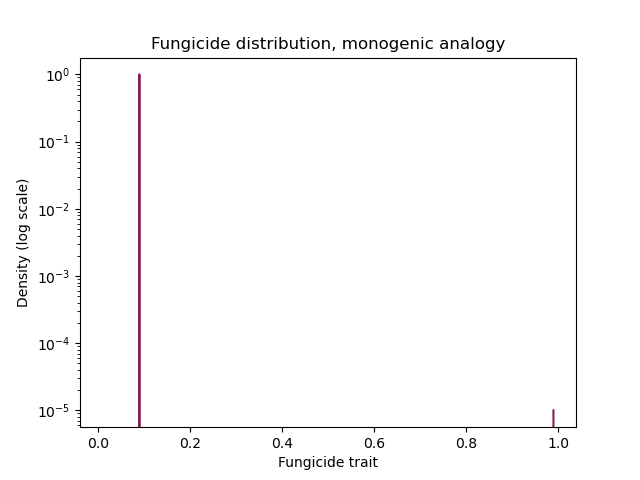

In [271]:
f, ax = plt.subplots()

ax.plot(sim.k_vec, init_dist3)

ax.set_yscale('log')

ax.set_xlabel('Fungicide trait')
ax.set_ylabel('Density (log scale)')

ax.set_title('Fungicide distribution, monogenic analogy')

In [272]:
f.savefig('../figures/rough/mono_dist.jpg')

In [262]:
conf_plot = copy.deepcopy(cfdm)

data_list_dm = []

for dd in doses:
    conf_plot.doses_A = dd*np.ones(conf_plot.n_years)
    conf_plot.doses_B = dd*np.ones(conf_plot.n_years)
    
    sim = SimulatorMixture(conf_plot)

    sim.initial_fA_dist = init_dist3
    sim.initial_fB_dist = init_dist3
    
    data = sim.run_model()
    
    data_list_dm.append(data['yield_vec'])

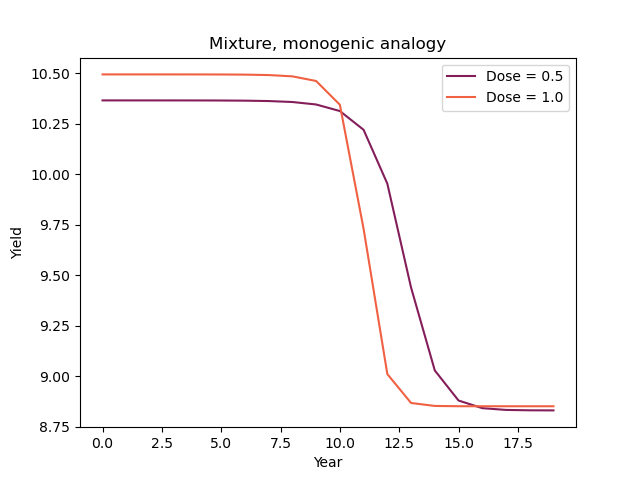

In [265]:
f = yield_plot(data_list_dm, 'Mixture, monogenic analogy')

In [266]:
f.savefig('../figures/rough/mono_analogy.jpg')

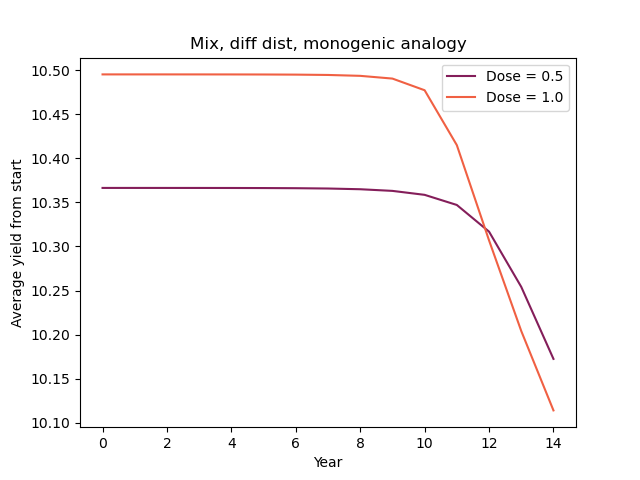

In [259]:
f = av_yield_plot(data_list_dm, 'Mix, diff dist, monogenic analogy')

# Stochasticity

In [24]:
cfs = Config(n_years=20)

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_k = 50
n_l = 50
n_years = 20
replace_cultivars = None
sprays = None
type = single



In [25]:
noise = np.abs(np.random.normal(0, 1, size=cfs.n_k))
noise

array([0.79534355, 0.95249242, 0.56921155, 0.76694834, 0.98122852,
       0.60439502, 2.24269089, 1.14933257, 1.42168129, 0.20496202,
       1.15428913, 0.21370078, 1.13207134, 0.02264297, 0.04288019,
       0.08144379, 0.14789644, 0.80744459, 0.21699709, 0.12228427,
       1.7394971 , 0.76293877, 0.06313786, 1.30084565, 0.98895736,
       0.49247231, 0.34030552, 0.40864048, 0.57236961, 0.2583155 ,
       1.30401148, 0.57674631, 1.19062106, 0.80402386, 0.16100226,
       0.60581087, 0.72204363, 0.5643247 , 0.72253079, 0.15914046,
       0.18891219, 0.13847698, 0.90526046, 0.51096667, 0.57930655,
       0.68152598, 0.99612237, 0.50376648, 0.40341417, 1.5598404 ])

In [26]:
for pr in np.logspace(-4, -1, 4):
    in_dt = old_dist + pr*noise
    in_dt = in_dt / sum(in_dt)

<ipython-input-55-30fb5b2415ca>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots()


Text(0.5, 1.0, 'Fungicide distribution')

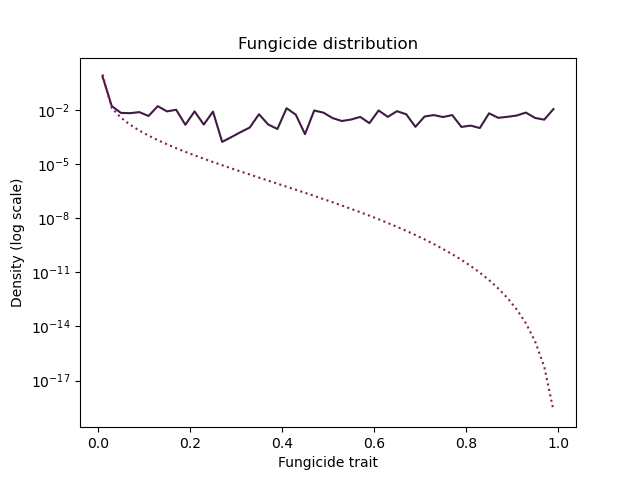

In [55]:
f, ax = plt.subplots()

ax.plot(sim.k_vec, in_dt)
ax.plot(sim.k_vec, old_dist, ls=':')

ax.set_yscale('log')

ax.set_xlabel('Fungicide trait')
ax.set_ylabel('Density (log scale)')

ax.set_title('Fungicide distribution')

In [32]:
doses = np.linspace(0,1,5)

In [33]:
b = cfs.k_b
a = cfs.k_b*cfs.k_mu

old_dist = gamma_dist(cfs.n_k, a, b)

In [44]:
conf_plot = copy.deepcopy(cfs)

conf_plot.betas = 1.5*conf_plot.betas

data_list_s = []
data_list_sa = []


for pr in tqdm(np.logspace(-10, -2, 3)):
    in_dt = old_dist + pr*noise
    in_dt = in_dt / sum(in_dt)

    for dd in doses:
        conf_plot.doses = dd*np.ones(conf_plot.n_years)

        sim = SimulatorOneTrait(conf_plot)

        sim.initial_k_dist = in_dt

        data = sim.run_model()

        data_list_sa.append(data)
        data_list_s.append(data['yield_vec'])

100%|██████████| 3/3 [00:18<00:00,  6.26s/it]


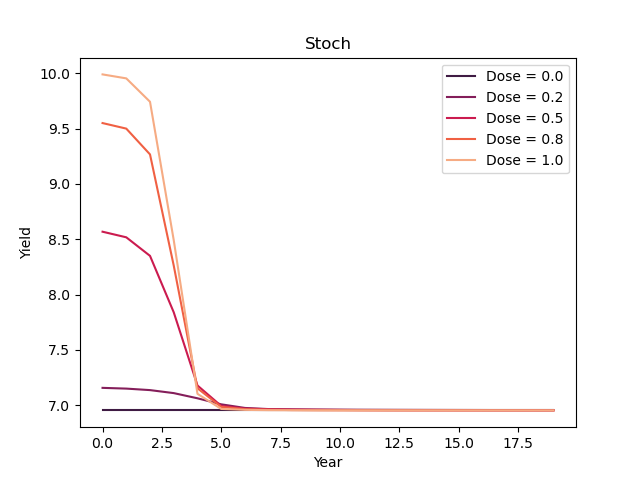

In [43]:
N = 0
n_sp = len(doses)

f = yield_plot(data_list_s[N*n_sp:n_sp*(N+1)], 'Stoch')

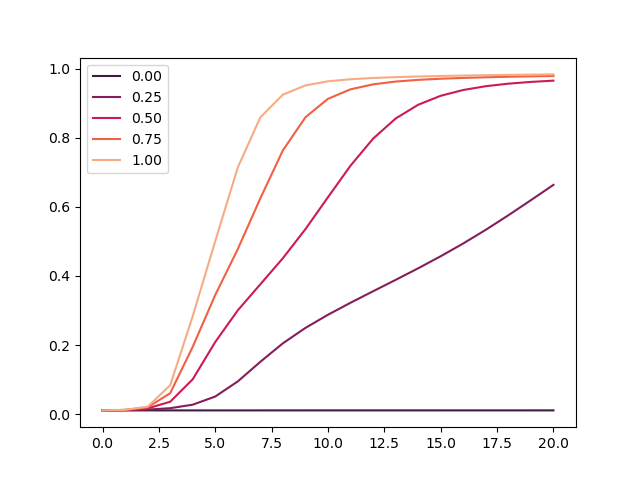

In [52]:
f, ax = plt.subplots()

for ii in range(5):
    ax.plot(data_list_sa[ii]['fung_mean'], label=f'{doses[ii]:.2f}')
    
ax.legend()

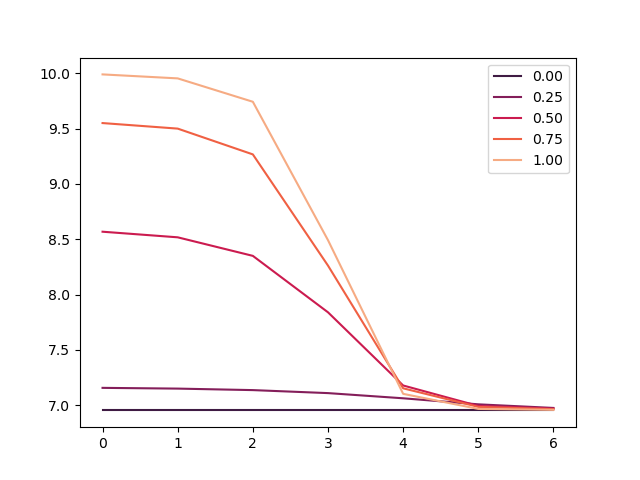

In [54]:
f, ax = plt.subplots()

for ii in range(5):
    ax.plot(data_list_sa[ii]['yield_vec'][:7], label=f'{doses[ii]:.2f}')
    
ax.legend()

# Specific strains at higher density

In [95]:
cc = Config()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_k = 50
n_l = 50
n_years = 15
replace_cultivars = None
sprays = None
type = single



In [96]:
sim = SimulatorOneTrait(cc)

In [103]:
eps = 1e-5

init_dist_use = (
    (1-eps)*sim.initial_k_dist
    + eps*(
        # signal.unit_impulse(sim.n_k, 10) + 
        signal.unit_impulse(sim.n_k, 25) +
        signal.unit_impulse(sim.n_k, 45)
    ) / 2
)

In [104]:
doses = np.linspace(0,1,3)

In [105]:
data_sp_list_all = []
data_sp_list = []

for dd in doses:
    cc.doses = dd*np.ones(cc.n_years)
    
    sim = SimulatorOneTrait(cc)
    
    sim.initial_k_dist = init_dist_use
    
    data = sim.run_model()
    
    data_sp_list.append(data['yield_vec'])
    data_sp_list_all.append(data)

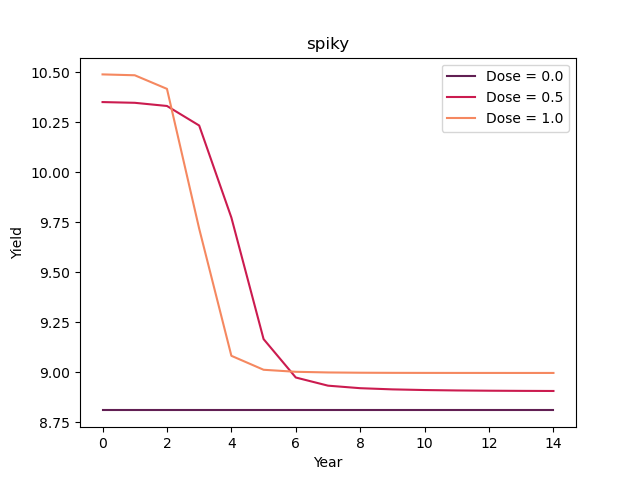

In [106]:
f = yield_plot(data_sp_list, title='spiky')

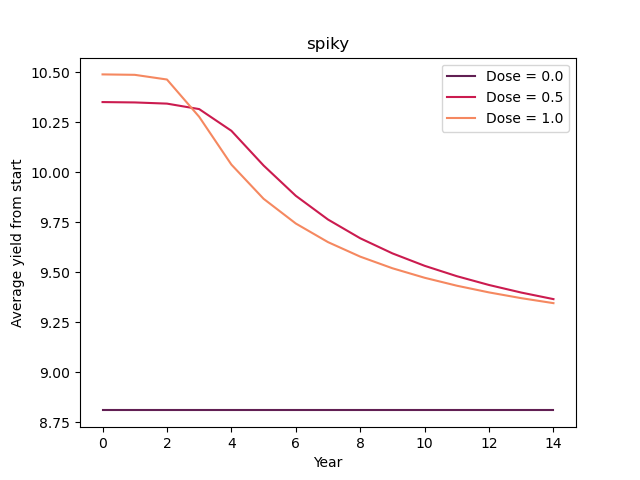

In [107]:
f = av_yield_plot(data_sp_list, title='spiky')

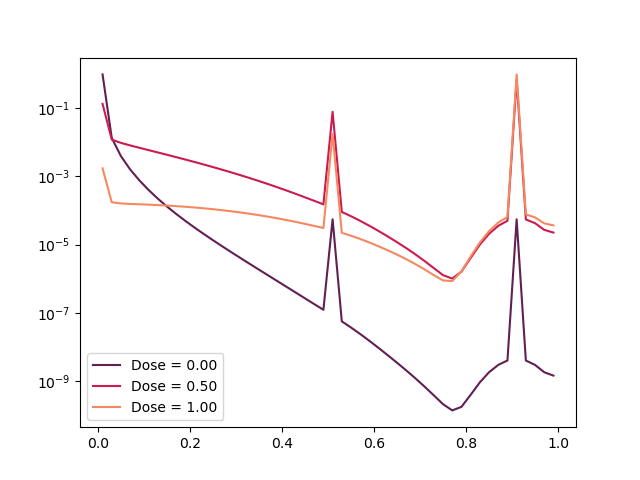

In [108]:
f, ax = plt.subplots()

for ind, ddd in enumerate(data_sp_list_all):
    ax.plot(ddd['k_vec'], ddd['fung_dists'][:,5], label=f'Dose = {doses[ind]:.2f}')
    
    
ax.set_yscale('log')

ax.legend()

Interesting how this plot depends on `eps` - seemingly get high dose worse for small values of `eps` - presumably then stronger selection becomes more important but has limited effect for low doses?

Worth exploring mutation more as well.

# Flat dist

In [10]:
ccf = Config(verbose=False)

ccf.mutation_proportion = None
ccf.mutation_scale_fung = None
ccf.mutation_scale_host = None

ccf.print_repr()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = None
mutation_scale_fung = None
mutation_scale_host = None
n_k = 50
n_l = 50
n_years = 15
replace_cultivars = None
sprays = None
type = single



In [11]:
sim = SimulatorSimple(ccf)

In [78]:
# UNIFORM
init_dist_use = np.ones(ccf.n_k) / ccf.n_k

# DELTAS
# pr = 1e-8
# init_dist_use = np.zeros(ccf.n_k)
# init_dist_use[0] = 1-pr
# init_dist_use[-1] = pr

# SEVERAL DELTAS
# pr = 1e-8
# init_dist_use = np.zeros(ccf.n_k)
# init_dist_use[0] = 1-5*pr
# init_dist_use[10] = pr
# init_dist_use[20] = pr
# init_dist_use[30] = pr
# init_dist_use[40] = pr
# init_dist_use[-1] = pr

In [79]:
doses = np.linspace(0,1,11)

In [80]:
data_sp_list_all = []
data_sp_list = []

for dd in doses:
    ccf.doses = dd*np.ones(ccf.n_years)
    
    sim = SimulatorSimple(ccf)
    
    sim.initial_k_dist = init_dist_use
    
    data = sim.run_model()
    
    data_sp_list.append(data['dis_sev'])
    data_sp_list_all.append(data)

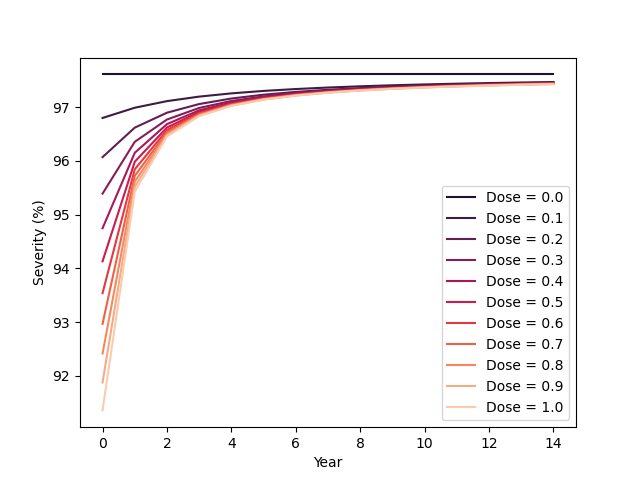

In [81]:
f = sev_plot(data_sp_list, title='')

In [82]:
d1 = data_sp_list_all[1]

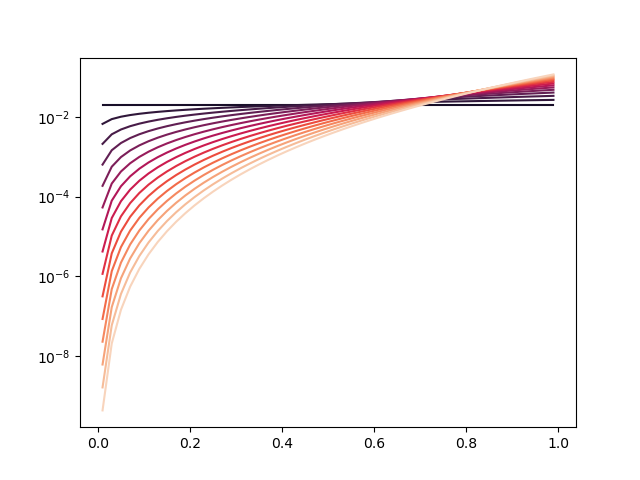

In [104]:
f, ax = plt.subplots()

sns.set_palette('rocket', n_colors=ccf.n_years)

for ii in range(ccf.n_years):
    ax.plot(d1['k_vec'], d1['fung_dists'][:, ii])
    
ax.set_yscale('log')

# Range of beta dists

In [275]:
ccf = Config(verbose=False)

ccf.mutation_proportion = None
ccf.mutation_scale_fung = None
ccf.mutation_scale_host = None

ccf.betas = ccf.betas*100

ccf.print_repr()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.7865416, 0.7865416, 0.7865416, 0.786541 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = None
mutation_scale_fung = None
mutation_scale_host = None
n_k = 50
n_l = 50
n_years = 15
replace_cultivars = None
sprays = None
type = single



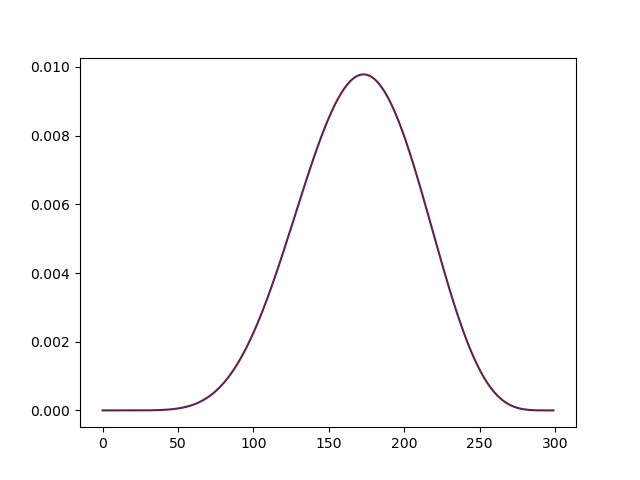

In [769]:
f, ax = plt.subplots()

ax.plot(init_dist)

In [276]:
np.random.seed(0)

In [313]:
# a_gen = np.random.uniform(0,20)
# b_gen = np.random.uniform(0,50)
# init_dist = beta_dist(ccf.n_k, a_gen, b_gen)

a_gen = np.random.uniform(0,20)
b_gen = np.random.uniform(0,5)
init_dist = gamma_dist(ccf.n_k, a_gen, b_gen)

doses = np.linspace(0,1,4)[1:]

data_sp_list = []

for dd in doses:
    ccf.doses = dd*np.ones(ccf.n_years)
    
    sim = SimulatorSimpleWithDD(ccf)
    # sim = SimulatorSimple(ccf)
    
    sim.initial_k_dist = init_dist
    
    data = sim.run_model()
    
    data_sp_list.append(data['dis_sev'])

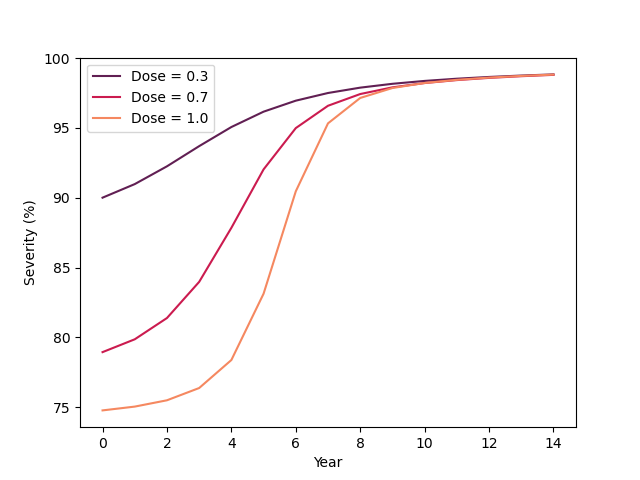

In [314]:
f = sev_plot(data_sp_list)

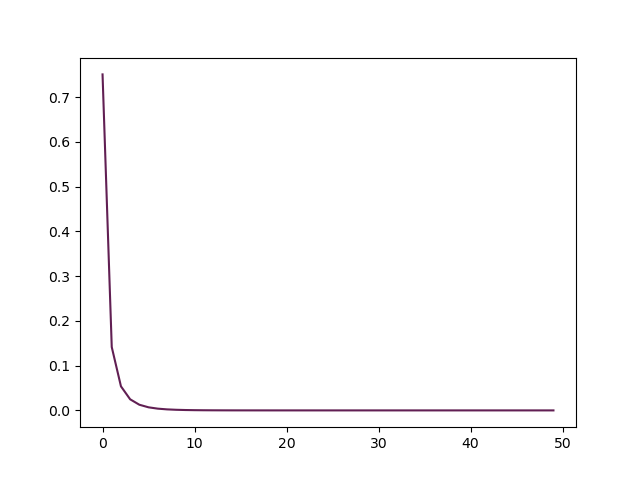

In [315]:
f, ax = plt.subplots()

ax.plot(init_dist)

# Discrete approximating continuous

In [378]:
ccf = Config(
    verbose=False, 
    n_k=101,
    n_years=100,
)

ccf.mutation_proportion = None
ccf.mutation_scale_fung = None
ccf.mutation_scale_host = None

# ccf.betas = ccf.betas*100

ccf.print_repr()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = None
mutation_scale_fung = None
mutation_scale_host = None
n_k = 101
n_l = 50
n_years = 100
replace_cultivars = None
sprays = None
type = single



In [379]:
init_dist = np.ones(ccf.n_k)

N_strains = 3

for ii in range(len(init_dist)):
    cond = ii % floor((len(init_dist))/(N_strains-1))
    
    if cond:
        init_dist[ii] = 0

init_dist = init_dist / init_dist.sum()

init_dist

array([0.33333333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [380]:
doses = np.linspace(0,1,4)[1:]

data_sp_list = []

for dd in doses:
    ccf.doses = dd*np.ones(ccf.n_years)
    
    # sim = SimulatorSimpleWithDD(ccf)
    sim = SimulatorSimple(ccf)
    
    sim.initial_k_dist = init_dist
    
    data = sim.run_model()
    
    data_sp_list.append(data['dis_sev'])

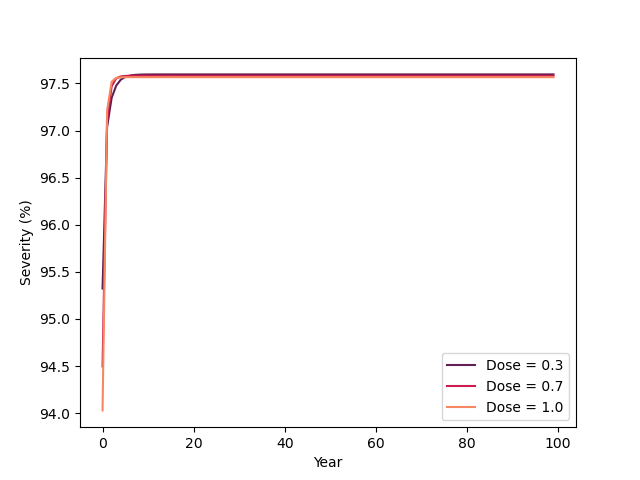

In [381]:
f = sev_plot(data_sp_list)

If `N_strains=3` get high doses worst after middling number of years but best initially and after many years. Dist is same at the start and at the end, so high doses better.

Similarly for `N_strains=10,20`.

If `N_strains=n_k`, get that high doses always best.

Check the result - should expect that even if best in middle period, that with all density at `p_n` that spraying a higher dose should return to being the best tactic.

# Monogenic with k_2=/=1

In [382]:
ccf = Config(
    verbose=False, 
    n_k=101,
    n_years=100,
)

ccf.mutation_proportion = None
ccf.mutation_scale_fung = None
ccf.mutation_scale_host = None

# ccf.betas = ccf.betas*100

ccf.print_repr()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = None
mutation_scale_fung = None
mutation_scale_host = None
n_k = 101
n_l = 50
n_years = 100
replace_cultivars = None
sprays = None
type = single



In [391]:
init_dist = np.zeros(ccf.n_k)

pr = 1e-4

init_dist[0] = 1-pr
init_dist[-1] = pr

init_dist

array([9.999e-01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [392]:
doses = np.linspace(0,1,4)[1:]

data_sp_list = []

for dd in doses:
    ccf.doses = dd*np.ones(ccf.n_years)
    
    # sim = SimulatorSimpleWithDD(ccf)
    sim = SimulatorSimple(ccf)
    
    sim.initial_k_dist = init_dist
    
    data = sim.run_model()
    
    data_sp_list.append(data['dis_sev'])

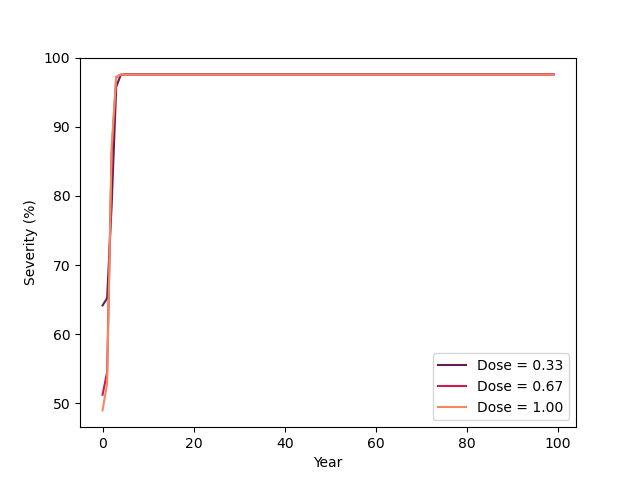

In [393]:
f = sev_plot(data_sp_list)

So if monogenic isn't at 1 then eventually with all the density there high doses are better.

# Exponential initial dist

In [422]:
ccf = Config(
    verbose=False, 
    n_k=101,
    n_years=400,
)

ccf.mutation_proportion = None
ccf.mutation_scale_fung = None
ccf.mutation_scale_host = None

# ccf.betas = ccf.betas*100

ccf.print_repr()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = None
mutation_scale_fung = None
mutation_scale_host = None
n_k = 101
n_l = 50
n_years = 400
replace_cultivars = None
sprays = None
type = single



In [423]:
from poly2.utils import edge_values
from math import exp

In [424]:
xx = edge_values(101)

L = 100

exp_dist = np.array(
    [ exp(-L*xx[ii+1]) - exp(-L*xx[ii]) for ii in range(len(xx)-1)]
)

exp_dist = exp_dist/exp_dist.sum()

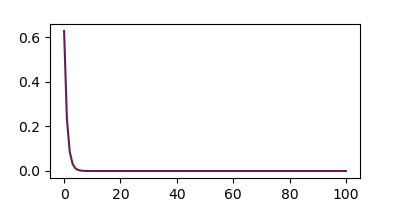

In [425]:
f,ax = plt.subplots(figsize=(4,2))

ax.plot(exp_dist)

In [426]:
doses = np.linspace(0,1,4)[1:]

data_sp_list = []

for dd in doses:
    ccf.doses = dd*np.ones(ccf.n_years)
    
    # sim = SimulatorSimpleWithDD(ccf)
    sim = SimulatorSimple(ccf)
    
    sim.initial_k_dist = exp_dist
    
    data = sim.run_model()
    
    data_sp_list.append(data['dis_sev'])

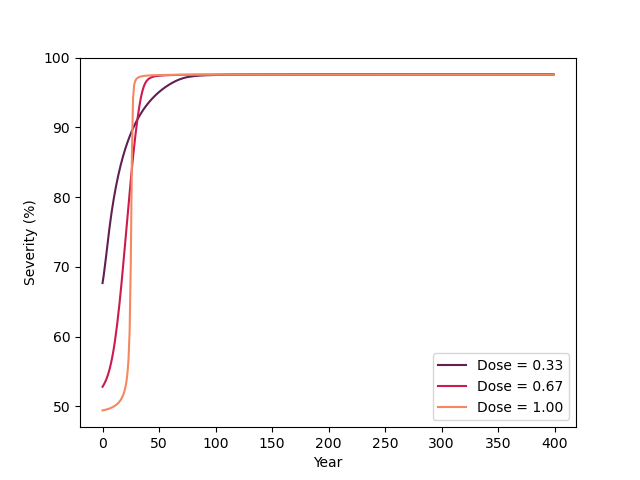

In [427]:
f = sev_plot(data_sp_list)

Running with `L=100`, `years=400` gives us an example with transient behaviour - short and long run high doses best but medium low doses are.

So might need to run big simulation to test?

# Exponential power law

In [428]:
ccf = Config(
    verbose=False, 
    n_k=101,
    n_years=400,
)

ccf.mutation_proportion = None
ccf.mutation_scale_fung = None
ccf.mutation_scale_host = None

# ccf.betas = ccf.betas*100

ccf.print_repr()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = None
mutation_scale_fung = None
mutation_scale_host = None
n_k = 101
n_l = 50
n_years = 400
replace_cultivars = None
sprays = None
type = single



In [431]:
xx = edge_values(101)

L = 10
alpha = 0.5

exp_dist = np.array(
    [ exp(-L*(xx[ii+1]**alpha)) - exp(-L*(xx[ii]**alpha)) for ii in range(len(xx)-1)]
)

exp_dist = exp_dist/exp_dist.sum()

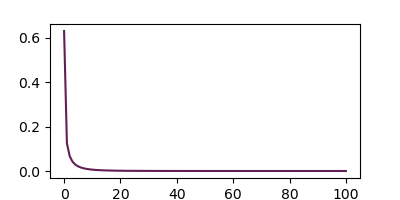

In [432]:
f,ax = plt.subplots(figsize=(4,2))

ax.plot(exp_dist)

In [433]:
doses = np.linspace(0,1,4)[1:]

data_sp_list = []

for dd in doses:
    ccf.doses = dd*np.ones(ccf.n_years)
    
    # sim = SimulatorSimpleWithDD(ccf)
    sim = SimulatorSimple(ccf)
    
    sim.initial_k_dist = exp_dist
    
    data = sim.run_model()
    
    data_sp_list.append(data['dis_sev'])

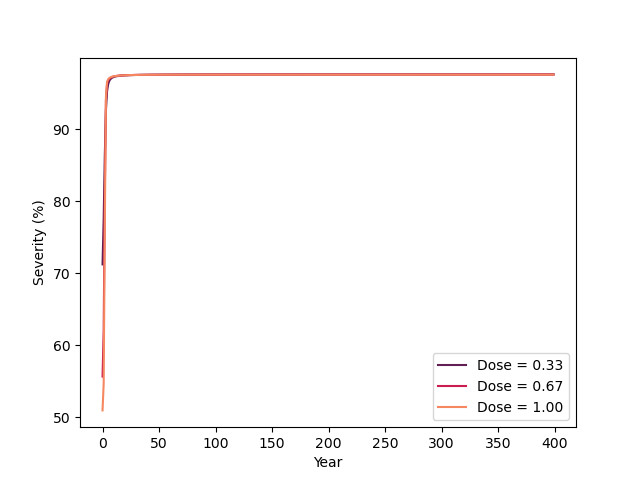

In [434]:
f = sev_plot(data_sp_list)

In [436]:
sum(

2054.233420378095

# Checking maths

In [477]:
px = 1e-12

x = np.linspace(px, 1-px, 1001)

In [478]:
def integ(B, x):
    return np.log(x) * x * np.exp(B*x)

In [479]:
B = 200

In [480]:
integrand = integ(B, x)

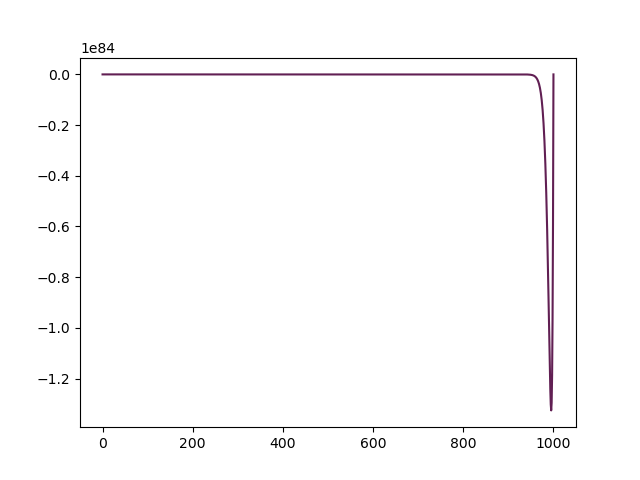

In [481]:
f, ax = plt.subplots()

ax.plot(integrand)

In [482]:
integrand.sum() * (x[1] - x[0])

-1.791405793306613e+82

In [483]:
from scipy.integrate import trapz

In [484]:
trapz(integrand, x)

-1.7914057932704854e+82

In [485]:
(-1/(B**2))*exp(B)

-1.8064934420314372e+82

In [486]:
(-1/((1-0.1)*B**2))*exp(B)

-2.0072149355904858e+82

In [551]:
N = 110
A = 0.1
L = 0

In [552]:
B1 = N*A - L
B2 = (N-1)*A - L

In [553]:
I1 = trapz(integ(B1, x), x)
I1

-444.66203830887014

In [554]:
I2 = trapz(integ(B2, x), x)
I2

-409.2811713189131

In [555]:
sum1 = N * B1 * I1 * (exp(-A) - exp(-N*A + L))
sum1

-486830.70307592285

In [556]:
sum2 = (N-1) * B2 * I2 * (1- exp(-N*A + L))
sum2

-486258.83815873653

In [557]:
sum1 - sum2

-571.8649171863217

In [558]:
sum1a = N * B1 * exp(-A) * I1
sum1a

-486839.68927682604

In [559]:
sum2a = (N-1) * B2 * I2
sum2a

-486266.9596440007

In [560]:
sum1a - sum2a

-572.7296328253578

In [561]:
Iap1 = (-1) * exp(B1) / (B1**2)
Iap2 = (-1) * exp(B2) / (B2**2)

In [562]:
I1/Iap1, I2/Iap2

(0.8986200903104757, 0.8975629325525747)

In [563]:
sum1b = N * B1 * exp(-A) * (-1) * exp(B1) / (B1**2)
sum1b

-541763.6379669872

In [564]:
sum2b = (N-1) * B2 * (-1) * exp(B2) / (B2**2)
sum2b

-541763.6379669876

In [565]:
sum1b - sum2b

3.4924596548080444e-10

In [566]:
(sum1a, sum1b)/sum1, (sum2a, sum2b)/sum2

(array([1.00001846, 1.11283786]), array([1.0000167 , 1.11414661]))

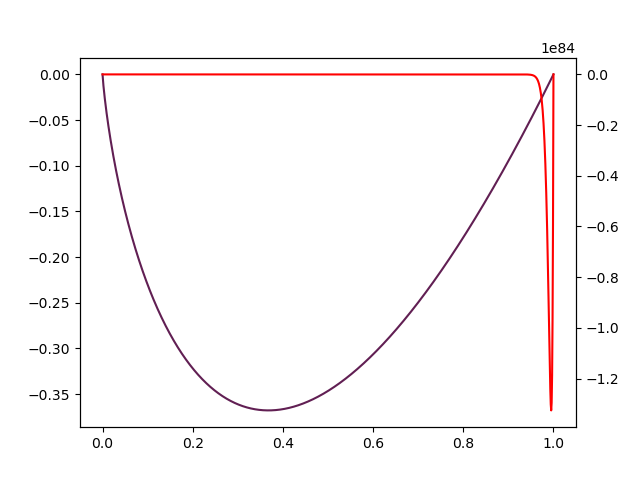

In [567]:
f, ax =plt.subplots()

y = np.log(x)*x

ax.plot(x, y)

ax2 = ax.twinx()

ax2.plot(x, integrand, c='r')